*adapted from Thomas Nield "Essential Math for Data Science", O'Reilly, 2022*

# Solving linear regression using SymPy

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sympy import*


# 2. Import Data

In [2]:
# Import points from CSV
# pd.read.csv("https://bit.ly/2KF29Bd"): Reads a CSV file from the specified URL and loads it into a Pandas DataFrame
# .itertuples: Iterates over the rows of the DataFrameand returns each row as a named tuple. This allows to access the data in each row using attribute names (column names)
#list(): Converts the iterable of named tuples into a Python list. This can be useful if you want to work with the rows of the DataFrame as a list of tuples, where each tuple represents a row of data from the CSV file


points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())


ValueError: ignored

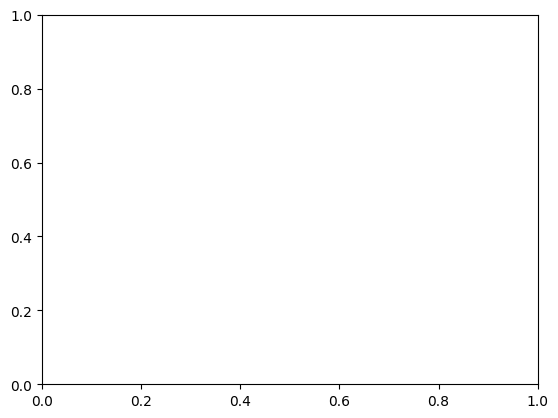

In [3]:
data  = pd.read_csv("https://bit.ly/2KF29Bd")
input_x = data.iloc[:1].values
input_y = data.iloc[:-1].values

plt.scatter(input_x, input_y)

In [4]:
print(points)

[Pandas(Index=0, x=1, y=5), Pandas(Index=1, x=2, y=10), Pandas(Index=2, x=3, y=10), Pandas(Index=3, x=4, y=15), Pandas(Index=4, x=5, y=14), Pandas(Index=5, x=6, y=15), Pandas(Index=6, x=7, y=19), Pandas(Index=7, x=8, y=18), Pandas(Index=8, x=9, y=25), Pandas(Index=9, x=10, y=23)]


# 3. Symbolic Math

In [5]:
# Define symbolic variables
m,b,i,n = symbols('m b i n')
# Define symbolic functions on which you can perform operations like differentiation and integration
x,y = symbols('x y',cls=Function)

# 4. Define the Loss function
\
$e(x) = \sum^{n}_{i=0} ((mx_i + b)-y_i)^2$



In [6]:
# Define symbolic expression for the sum of squares with the parameters m and b
sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i,0,n))

# 5. Calculate the partial derivates

In [7]:
d_m = diff(sum_of_squares, m)\
      .subs(n,len(points)-1).doit()\
      .replace(x, lambda i: points[i].x)\
      .replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b)\
      .subs(n,len(points)-1).doit()\
      .replace(x, lambda i: points[i].x)\
      .replace(y, lambda i: points[i].y)

In [8]:
# Compile using lamdify for faster computation
# The lambdify function from the SymPy library converts a symbolic expression (here: d_b and d_m) involving symbolic variables (here: m and b) into a callable Python function

d_m = lambdify([m,b], d_m)
d_b = lambdify([m,b], d_b)

# 6. Building the model

In [9]:
# Initialize
m = 0.0
b = 0.0

In [10]:
# Define Learning rate
L = .001

In [11]:
# Define number of iterations
iterations = 100_000

In [12]:
# Perform Gradient Descent

for i in range (iterations):
  # update m and b
  m -= d_m(m,b) * L
  b -= d_b(m,b) * L

In [13]:
print("y = {0}x + {1}".format(m,b))

y = 1.939393939393954x + 4.733333333333231
